## Dataset

## Objective/Business Solution

- Build a system that can predict the presence of heart disease using patient health data and vitals.
- Predict if a patient has heart disease (binary classification: normal or heart disease).
- Explore the data to understand key features like age, blood pressure, cholesterol, and heart rate to figure out an approach.

## Importing the libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import joblib

pd.set_option('display.max_columns', None)

## Loading the data

In [13]:
df = pd.read_csv('dataset.csv')

In [14]:
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [15]:
df = df.rename(columns={'chest pain type': 'chest_pain_type', 'resting bp s': 'resting_bp_s', 'fasting blood sugar': 'fasting_blood_sugar', 'resting ecg':'resting_ecg', 'max heart rate':'max_heart_rate', 'exercise angina':'exercise_angina', 'ST slope':'st_slope'})
df

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


## Data Cleaning

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest_pain_type      1190 non-null   int64  
 3   resting_bp_s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting_blood_sugar  1190 non-null   int64  
 6   resting_ecg          1190 non-null   int64  
 7   max_heart_rate       1190 non-null   int64  
 8   exercise_angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  st_slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [36]:
df.duplicated().sum()

272

In [37]:
df.drop_duplicates(inplace=True)

#### As per the above process, we can say there is no null or duplicated values

## EDA

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
sex,918.0,0.789760,0.407701,0.0,1.00,1.0,1.0,1.0
chest_pain_type,918.0,3.251634,0.931031,1.0,3.00,4.0,4.0,4.0
resting_bp_s,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
fasting_blood_sugar,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
resting_ecg,918.0,0.603486,0.805968,0.0,0.00,0.0,1.0,2.0
max_heart_rate,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
exercise_angina,918.0,0.404139,0.490992,0.0,0.00,0.0,1.0,1.0
oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2


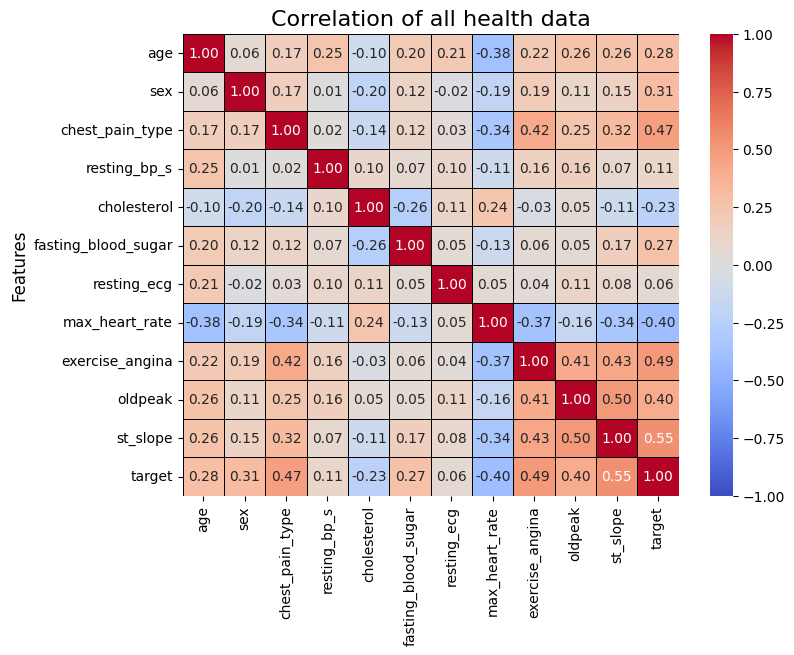

In [39]:
correlation_matrix = df.corr()
target_corr = correlation_matrix[['target']]

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='black', vmin=-1, vmax=1)

plt.title('Correlation of all health data', fontsize=16)
plt.ylabel('Features', fontsize=12)

plt.show()

### No multicolleaniarity

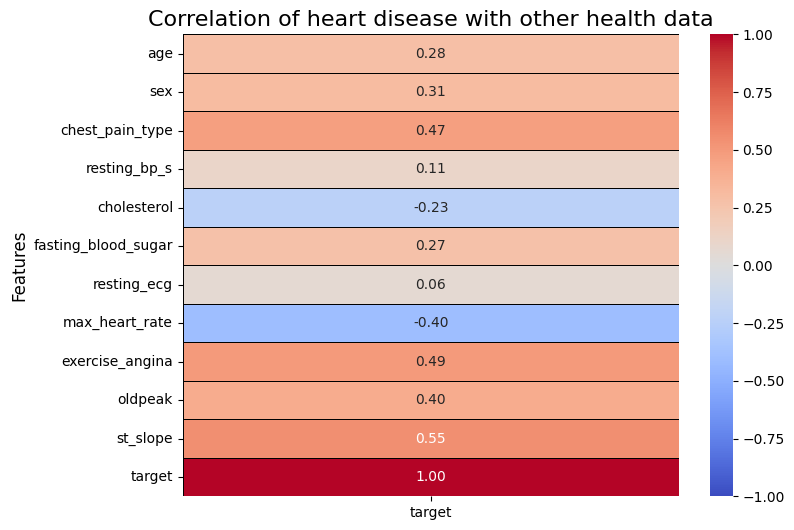

In [40]:
plt.figure(figsize=(8, 6))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='black', vmin=-1, vmax=1)

plt.title('Correlation of heart disease with other health data', fontsize=16)
plt.ylabel('Features', fontsize=12)

plt.show()

### ST slope, exercise angina, chest pain type are top 3 features which has high positive correlation with heart disease
### Max heart rate has high negative correlation with heart disease

In [41]:
df['target'].value_counts()/len(df['target'])

target
1    0.553377
0    0.446623
Name: count, dtype: float64

- Somewhat Balanced dataset

## Visualization for numerical variables

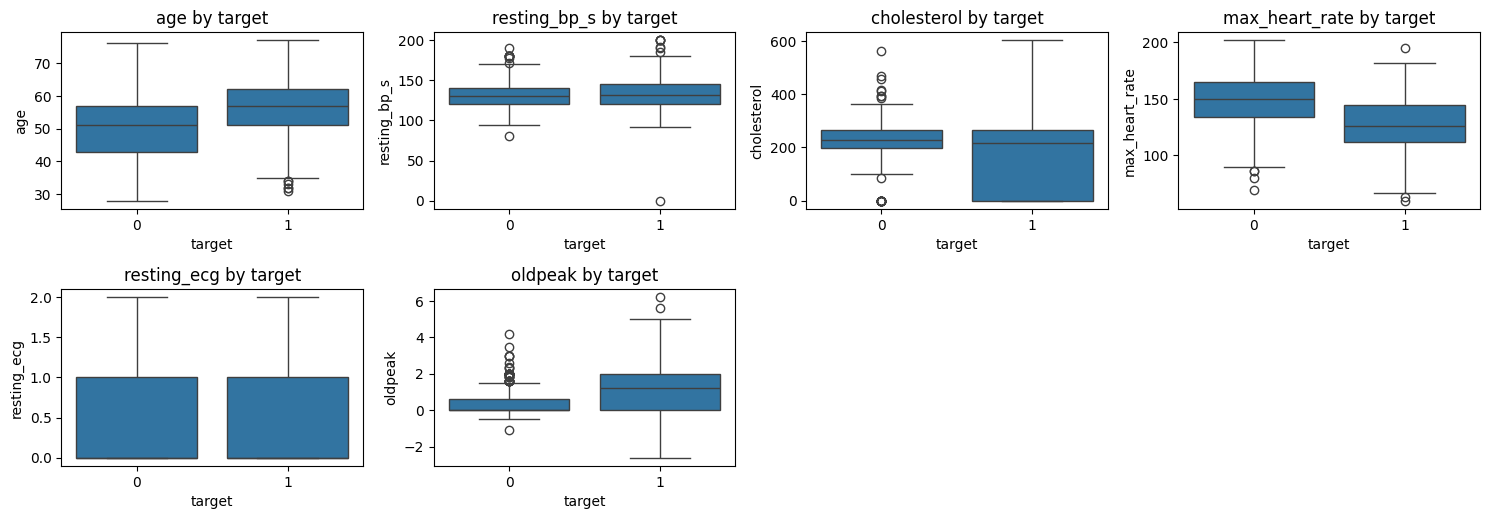

In [42]:
numeric_features = ['age', 'resting_bp_s', 'cholesterol', 'max_heart_rate', 'resting_ecg', 'oldpeak'] 
target = 'target'

plt.figure(figsize=(15, 10))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[target], y=df[feature])
    plt.title(f'{feature} by {target}')

plt.tight_layout()
plt.show()

## Visualization for categorical variables

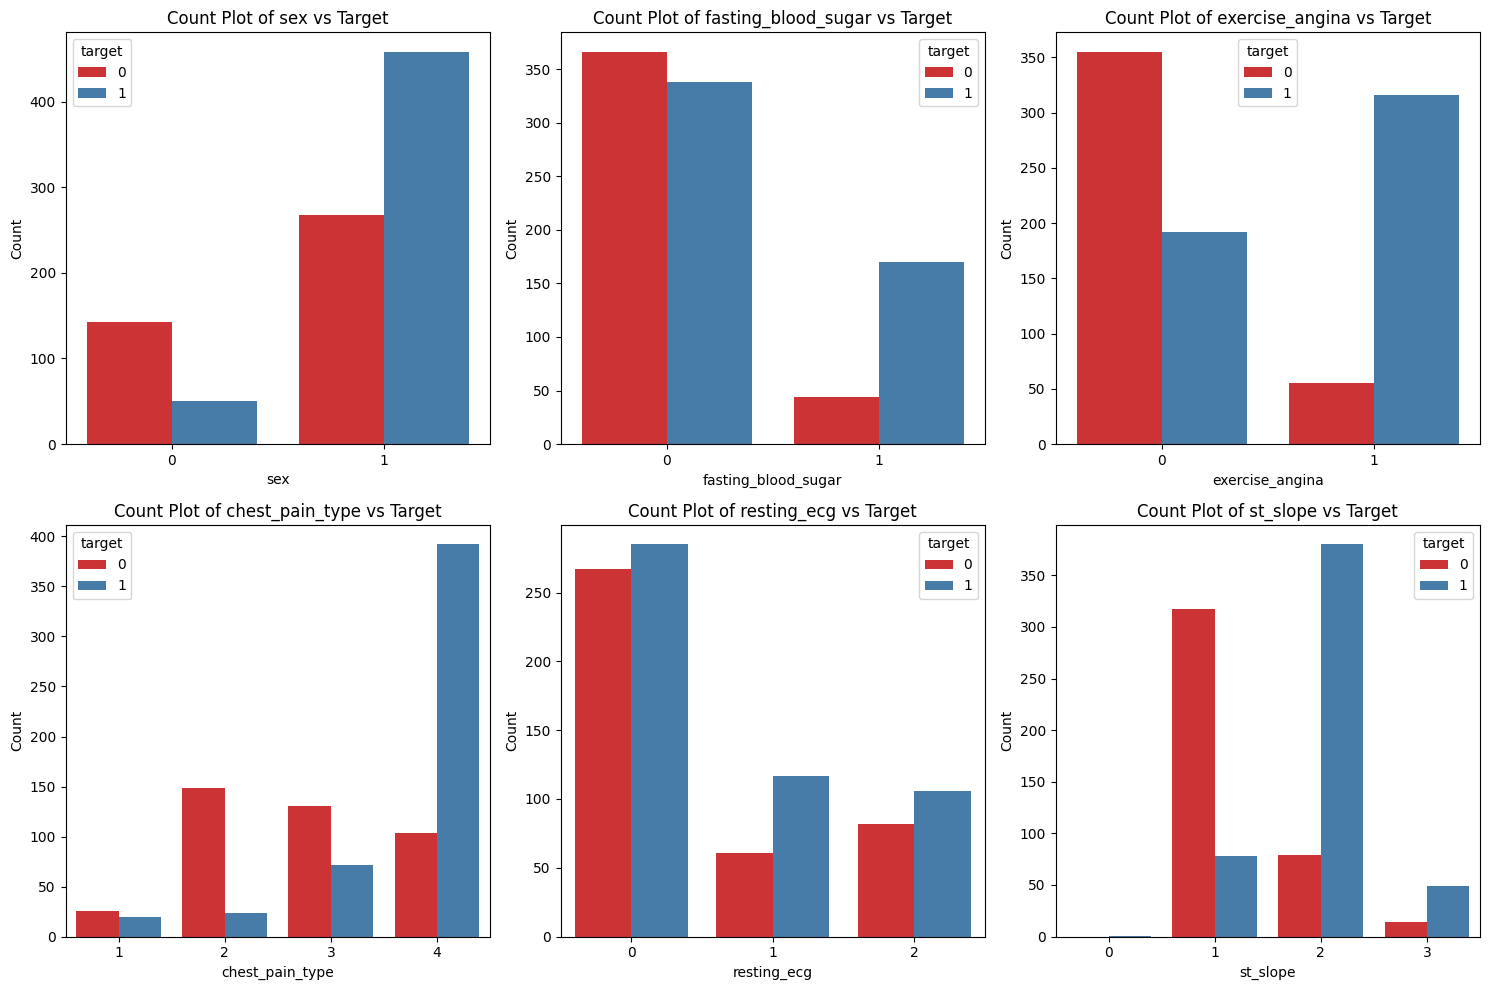

In [43]:
nominal_columns = ['sex', 'fasting_blood_sugar', 'exercise_angina', 'chest_pain_type', 'resting_ecg', 'st_slope']

plt.figure(figsize=(15, 10))

for i, col in enumerate(nominal_columns, 1):
    plt.subplot(2, 3, i)  # Adjust grid size (rows, columns) based on number of columns
    sns.countplot(data=df, x=col, hue='target', palette='Set1')
    plt.title(f'Count Plot of {col} vs Target')
    plt.xlabel(col)
    plt.ylabel('Count')

# Adjust layout for better display
plt.tight_layout()

# Display the plots
plt.show()

- Males have significatly higher heart disease than female
- exercise induced angina has higher heart disease
- chest pain of level 4 has significant effect of heart disease
- ST slope of value 2 has high heart disease

## Feature Engineering

In [44]:
df

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [45]:
num_columns = ['age', 'resting_bp_s', 'cholesterol', 'max_heart_rate', 'oldpeak']
ohe_columns = ['chest_pain_type', 'resting_ecg']
ordinal_columns = ['st_slope']

In [46]:
X = df.drop(columns=['target'])
y = df['target']

In [47]:
X

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope
0,40,1,2,140,289,0,0,172,0,0.0,1
1,49,0,3,160,180,0,0,156,0,1.0,2
2,37,1,2,130,283,0,1,98,0,0.0,1
3,48,0,4,138,214,0,0,108,1,1.5,2
4,54,1,3,150,195,0,0,122,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2
1186,68,1,4,144,193,1,0,141,0,3.4,2
1187,57,1,4,130,131,0,0,115,1,1.2,2
1188,57,0,2,130,236,0,2,174,0,0.0,2


In [48]:
y

0       0
1       1
2       0
3       1
4       0
       ..
1185    1
1186    1
1187    1
1188    1
1189    0
Name: target, Length: 918, dtype: int64

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_columns),
        ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ohe_columns),
        ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ordinal_columns)
    ],
    remainder='passthrough'
)


In [53]:
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier()
}

In [54]:
results = {}
for name, clf in classifiers.items():
    # Create pipeline with preprocessing and classifier
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])
    
    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    
    # Store results
    results[name] = {
        'Mean Accuracy': scores.mean(),
        'Std Dev Accuracy': scores.std()
    }

# Print results
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  Mean Accuracy: {metrics['Mean Accuracy']:.4f}")
    print(f"  Std Dev Accuracy: {metrics['Std Dev Accuracy']:.4f}")
    print()

Random Forest:
  Mean Accuracy: 0.8535
  Std Dev Accuracy: 0.0236

Support Vector Machine:
  Mean Accuracy: 0.8442
  Std Dev Accuracy: 0.0173

K-Nearest Neighbors:
  Mean Accuracy: 0.8442
  Std Dev Accuracy: 0.0263

Logistic Regression:
  Mean Accuracy: 0.8271
  Std Dev Accuracy: 0.0181

Decision Tree:
  Mean Accuracy: 0.7741
  Std Dev Accuracy: 0.0209



In [55]:
models = {
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'model__n_estimators': [100, 200, 300],
            'model__max_depth': [None, 10, 20, 30],
            'model__min_samples_split': [5, 10, 15],
        }
    },
    'Support Vector Machine': {
        'model': SVC(),
        'params': {
            'model__C': [0.1, 1, 10],
            'model__kernel': ['poly', 'rbf', 'sigmoid'],
            'model__gamma': ['scale', 'auto', 0.001]
        }
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'model__n_neighbors': [5, 7, 10, 15],
            'model__weights': ['uniform', 'distance']
        }
    }
}

In [56]:
for model_name, config in models.items():
    print(f"\nTraining {model_name}...")

    # Create pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', config['model'])
    ])

    # GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(pipeline, config['params'], cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    # Best model and parameters
    best_model = grid_search.best_estimator_
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")

    # Evaluate on test set
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))


Training Random Forest...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters for Random Forest: {'model__max_depth': 10, 'model__min_samples_split': 5, 'model__n_estimators': 100}
Random Forest Accuracy: 0.8877
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       112
           1       0.91      0.90      0.90       164

    accuracy                           0.89       276
   macro avg       0.88      0.89      0.88       276
weighted avg       0.89      0.89      0.89       276


Training Support Vector Machine...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for Support Vector Machine: {'model__C': 0.1, 'model__gamma': 'auto', 'model__kernel': 'rbf'}
Support Vector Machine Accuracy: 0.8587
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       112
           1       0.90      0.86      0.88       164

    accuracy          

## As we can evaluate Random Forest is performing better in F1 score and all aspects

## Save model

In [58]:
best_model = RandomForestClassifier(n_estimators=100, max_depth=40, min_samples_split=5)

pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', best_model)
    ])

best_cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
best_cv_mean_score = best_cv_scores.mean()

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"{name} Results:")
print(f"Cross-Validation Accuracy: {best_cv_mean_score:.2f}")
print(f"Test Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)
print("-" * 50)

Decision Tree Results:
Cross-Validation Accuracy: 0.86
Test Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       112
           1       0.94      0.90      0.92       164

    accuracy                           0.90       276
   macro avg       0.90      0.90      0.90       276
weighted avg       0.90      0.90      0.90       276

--------------------------------------------------


In [59]:
joblib.dump(pipeline, 'pipeline.joblib')

['pipeline.joblib']

In [60]:
df

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [4]:
X_new = pd.DataFrame({'age': [49],
    'sex': [0],
    'chest_pain_type': [3],
    'resting_bp_s': [160],
    'cholesterol': [180],
    'fasting_blood_sugar': [0],
    'resting_ecg': [0],
    'max_heart_rate': [156],
    'exercise_angina': [0],
    'oldpeak': [1.0],
    'st_slope': [2]})

X_new

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope
0,49,0,3,160,180,0,0,156,0,1.0,2


In [64]:
# scaled_data = scaler.transform(X_new)
pipeline.predict(X_new)[0]

1

In [19]:
X_new.get('age')[0]

49

In [17]:
column_list = df.columns.tolist()
X_columns = [col for col in column_list if col != 'target']
X_columns

['age',
 'sex',
 'chest_pain_type',
 'resting_bp_s',
 'cholesterol',
 'fasting_blood_sugar',
 'resting_ecg',
 'max_heart_rate',
 'exercise_angina',
 'oldpeak',
 'st_slope']